# CHAPTER 5 Getting Started with pandas

这一节终于要开始讲pandas了。闲话不说，直接开始正题。之后的笔记里，这样导入pandas：

In [1]:
import pandas as pd

另外可以导入Series和DataFrame，因为这两个经常被用到：

In [2]:
from pandas import Series, DataFrame

# 5.1 Introduction to pandas Data Structures

数据结构其实就是Series和DataFrame。

# 1 Series

这里series我就不翻译成序列了，因为之前的所有笔记里，我都是把sequence翻译成序列的。

series是一个像数组一样的一维序列，并伴有一个数组表示label，叫做index。创建一个series的方法也很简单：

In [3]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

可以看到，左边表示index，右边表示对应的value。可以通过value和index属性查看：

In [5]:
obj.values

array([ 4,  7, -5,  3])

In [6]:
obj.index # like range(4)

RangeIndex(start=0, stop=4, step=1)

当然我们也可以自己指定index的label：

In [4]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [8]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

可以用index的label来选择：

In [11]:
obj2['a']

-5

In [12]:
obj2['d'] = 6

In [13]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

这里['c', 'a', 'd']其实被当做了索引，尽管这个索引是用string构成的。

使用numpy函数或类似的操作，会保留index-value的关系：

In [14]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [15]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [5]:
import numpy as np
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

另一种看待series的方法，它是一个长度固定，有顺序的dict，从index映射到value。在很多场景下，可以当做dict来用：

In [18]:
'b' in obj2

True

In [19]:
'e' in obj2

False

还可以直接用现有的dict来创建series：

In [20]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon':16000, 'Utah': 5000}

In [21]:
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

series中的index其实就是dict中排好序的keys。我们也可以传入一个自己想要的顺序：

In [22]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [23]:
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

顺序是按states里来的，但因为没有找到california,所以是NaN。NaN表示缺失数据，用之后我们提到的话就用missing或NA来指代。pandas中的isnull和notnull函数可以用来检测缺失数据：

In [24]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [25]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

series也有对应的方法：

In [26]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

关于缺失数据，在第七章还会讲得更详细一些。

series中一个有用的特色自动按index label来排序（Data alignment features）：

In [27]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [28]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [29]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

这个Data alignment features（数据对齐特色）和数据库中的join相似。

serice自身和它的index都有一个叫name的属性，这个能和其他pandas的函数进行整合：

In [30]:
obj4.name = 'population'

In [31]:
obj4.index.name = 'state'

In [32]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

series的index能被直接更改：

In [33]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [34]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

# 2 DataFrame

DataFrame表示一个长方形表格，并包含排好序的列，每一列都可以是不同的数值类型（数字，字符串，布尔值）。DataFrame有行索引和列索引（row index, column index）；可以看做是分享所有索引的由series组成的字典。数据是保存在一维以上的区块里的。

（其实我是把dataframe当做excel里的那种表格来用的，这样感觉更直观一些）

构建一个dataframe的方法，用一个dcit，dict里的值是list：



In [36]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003], 
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)

frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


dataframe也会像series一样，自动给数据赋index, 而列则会按顺序排好。

对于一个较大的DataFrame，用head方法会返回前5行（注：这个函数在数据分析中经常使用，用来查看表格里有什么东西）：

In [37]:
frame.head()

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


如果指定一列的话，会自动按列排序：

In [38]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果你导入一个不存在的列名，那么会显示为缺失数据：

In [39]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five', 'six'])

In [40]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [42]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

从DataFrame里提取一列的话会返回series格式，可以以属性或是dict一样的形式来提取：

In [43]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [44]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

注意：frame2[column]能应对任何列名，但frame2.column的情况下，列名必须是有效的python变量名才行。

返回的series有DataFrame种同样的index，而且name属性也是对应的。

对于行，要用在loc属性里用 位置或名字：

In [45]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

列值也能通过赋值改变。比如给debt赋值：

In [46]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [47]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


如果把list或array赋给column的话，长度必须符合DataFrame的长度。如果把一二series赋给DataFrame，会按DataFrame的index来赋值，不够的地方用缺失数据来表示：

In [48]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


如果列不存在，赋值会创建一个新列。而del也能像删除字典关键字一样，删除列：

In [49]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


然后用del删除这一列：

In [51]:
del frame2['eastern']

In [52]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

注意：columns返回的是一个view，而不是新建了一个copy。因此，任何对series的改变，会反映在DataFrame上。除非我们用copy方法来新建一个。

另一种常见的格式是dict中的dict：

In [53]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

把上面这种嵌套dcit传给DataFrame，pandas会把外层dcit的key当做列，内层key当做行索引：

In [54]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


另外DataFrame也可以向numpy数组一样做转置：

In [55]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


指定index：

In [56]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


series组成的dict：

In [57]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}

In [58]:
pd.DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


其他一些可以传递给DataFrame的构造器：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/yv7rc.png)

如果DataFrame的index和column有自己的name属性，也会被显示：



In [59]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [60]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


values属性会返回二维数组：

In [61]:
frame3.values

array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

如果column有不同的类型，dtype会适应所有的列：

In [62]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

# 3 Index Objects (索引对象)

pandas的Index Objects (索引对象)负责保存axis labels和其他一些数据（比如axis name或names）。一个数组或其他一个序列标签，只要被用来做构建series或DataFrame，就会被自动转变为index：

In [63]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [64]:
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [65]:
index[1:]

Index(['b', 'c'], dtype='object')

index object是不可更改的：

In [67]:
index[1] = 'd'

TypeError: Index does not support mutable operations

正因为不可修改，所以data structure中分享index object是很安全的：

In [68]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [69]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [70]:
obj2.index is labels

True

index除了像数组，还能像大小一定的set：

In [71]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [72]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [73]:
'Ohio' in frame3.columns

True

In [74]:
2003 in frame3.columns

False

与python里的set不同，pandas的index可以有重复的labels：

In [75]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

在这种重复的标签中选择的话，会选中所有相同的标签。

Index还有一些方法和属性：
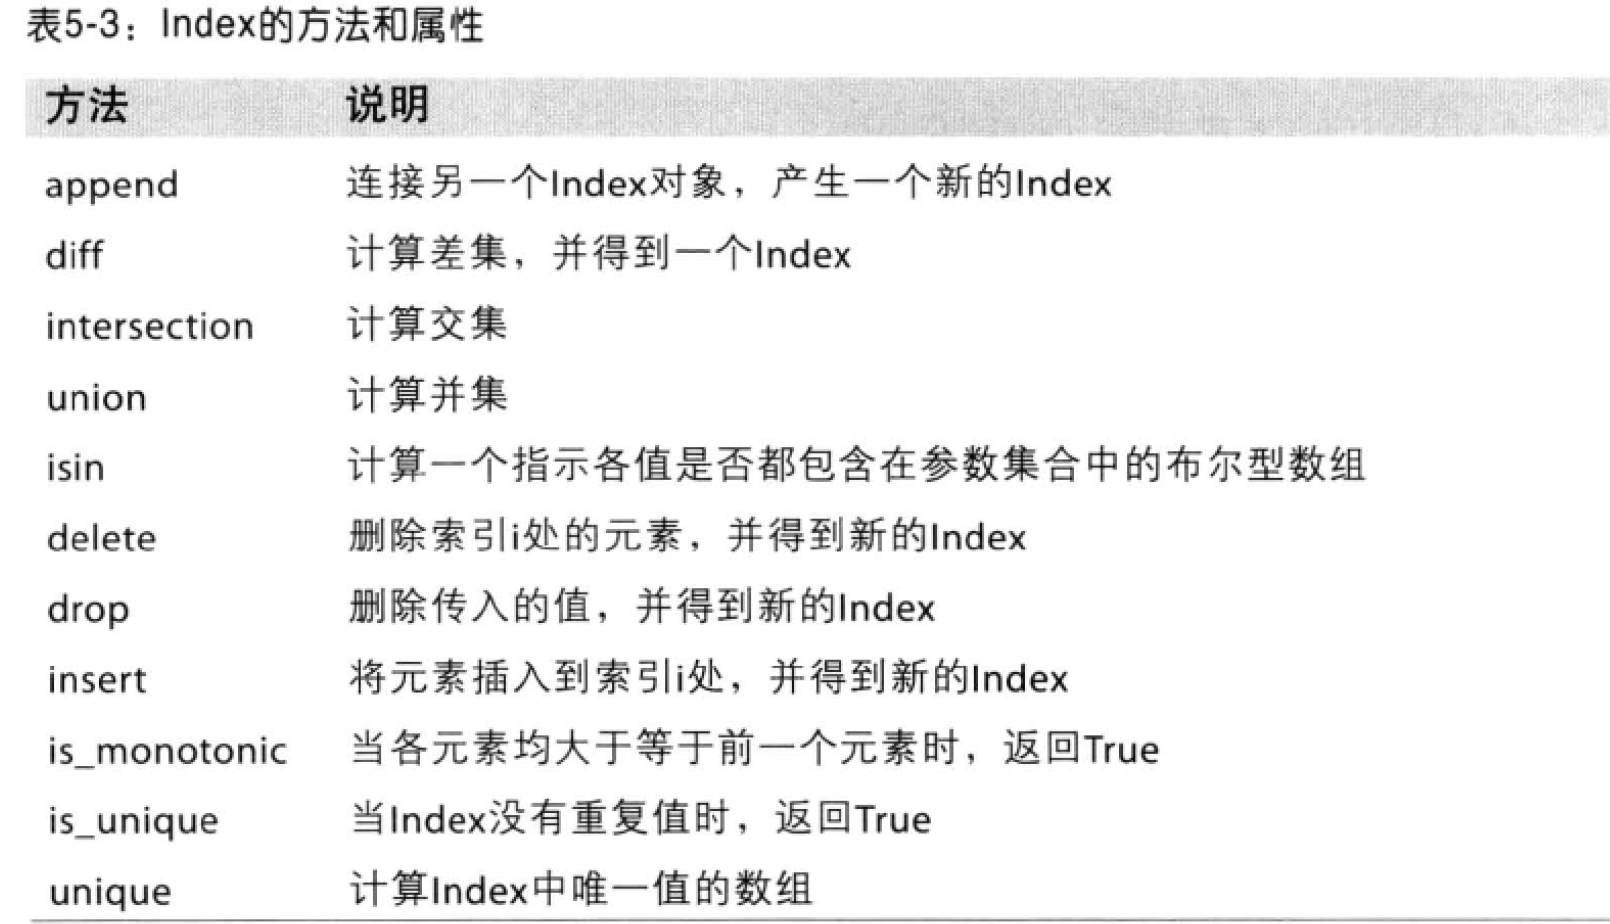

# 5.2 Essential Functionality（主要功能）

接下来介绍pandas中的一些主要功能，这里只介绍一些经常用到的。

# 1 Reindexing（重新索引）

pandas中一个重要的方法是reindex，已实施在创建object的时候遵照一个新的index。如下例：

In [3]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

在series上调用reindex能更改index，如果没有对应index的话会引入缺失数据：

In [4]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

在处理时间序列这样的数据时，我们可能需要在reindexing的时候需要修改值。method选项能做到这一点，比如设定method为ffill:

In [5]:
obj3 = pd.Series(['bule', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      bule
2    purple
4    yellow
dtype: object

In [6]:
obj3.reindex(range(6), method='ffill')

0      bule
1      bule
2    purple
3    purple
4    yellow
5    yellow
dtype: object

对于DataFrame，reindex能更改row index,或column index。reindex the rows:

In [8]:
import numpy as np

In [10]:
frame = pd.DataFrame(np.arange(9).reshape(3, 3),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

In [11]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [12]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


更改columns index:

In [13]:
states = ['Texas', 'Utah', 'California']

In [14]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


reindex的参数：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/x0pq4.png)

还可以使用loc更简洁的reindex：

In [15]:
frame.loc[['a', 'b', 'c', 'd'], states]

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


# 2 Dropping Entries from an Axis (按轴删除记录) 

对于series，drop回返回一个新的object，并删去你制定的axis的值：

In [16]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [17]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [18]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

对于DataFrame，index能按行或列的axis来删除：

In [21]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


行处理：如果a sequence of labels(一个标签序列)来调用drop，会删去row labels(axis 0):

In [22]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


列处理：drop列的话，设定axis=1或axis='columns':

In [23]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [24]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


drop也可以不返回一个新的object，而是直接更改series or dataframe in-place:

In [25]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

# 3 Indexing, Selection, and Filtering(索引，选择，过滤)

series indexing(obj[...]) 相当于numpy的array indexing, 而且除了整数，还可以使用series的index：

In [35]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [36]:
obj['b']

1.0

In [37]:
obj[1]

1.0

In [38]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [39]:
# 选中行
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [40]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [41]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

用label来slicing(切片)的时候，和python的切片不一样的在于，会包括尾节点：

In [42]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

可以直接给选中的label更改值：

In [43]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

而对于DataFrame，indexing可以通过一个值或序列，选中一个以上的列：

In [44]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [45]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [46]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


dataframe的indexing有一些比较特别的方式。比如通过布尔数组：

In [47]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [48]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


行选择的语法格式`data[:2]`是很方便的。给`[]`里传入一个list的话，可以选择列。

另一种方法是用boolean dataframe:

In [50]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [51]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## Selection with loc and iloc(用loc和iloc来选择)

对于label-indexing on rows, 我们介绍特别的索引符，loc and iloc. 这两个方法能通过axis labels(loc)或integer(iloc)，来选择行或列。

一个列子，选中一行多列by label：

In [55]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [52]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

同iloc实现相同的效果：

In [53]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [54]:
data.iloc[2] # 一行

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [56]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


indexing函数也能用于切片，不论是single labels或lists of labels:

In [57]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [58]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


pandas中有很多用于选择和重新选择数据的方法：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/bwadf.png)

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/lc2uc.png)

注意：当设计padnas的时候，作者发现frame[:, col]这样的语法是比较冗长的，因为这是会被经常用到的一个功能。作者把一些indexing的功能（lable or integer）集成在了ix这个方法上。实际中，因为这种label和integer都可以用的方式很方便，于是pandas team设计了loc和ilco来实现label-based和integer-based indexing.

虽然ix indexing依然错在，但是已经过时，不推荐使用。

# 4 Integer Indexes（整数索引）

一些新手再用integer来index的时候，总是会被绊倒。因为这种方法和python用于list和tuple的indexing方法不同。

比如，你不希望下面的代码出现error：


In [59]:
ser = pd.Series(np.arange(3.))

In [60]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [61]:
ser[-1]

KeyError: -1

看到了，pandas在整数索引上可能会出错。这里我们有一个index包括0，1，2，但是猜测用户想要什么是很困难的：

In [62]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

另一方面，如果用非整数来做index，就没有歧义了：

In [63]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

为了保持连贯性，如果axis index里包含integer，那么选择数据的时候，就会是label-orented. 为了更精确地选择，使用`loc`(for label)或`ilco`(for integers):

In [64]:
ser[:1]

0    0.0
dtype: float64

In [65]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [67]:
ser.iloc[:1]

0    0.0
dtype: float64

# 5 Arithmetic and Data Alignment (算数和数据对齐)

pandas一个有用的feature就是，不同index的obejct之间的算数计算。如果两个object相加，但他们各自的index并不相同，最后结果得到的index是这两个index的合集：

In [68]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [69]:
s2 = pd.Series([2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [70]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [71]:
s2

a    2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [72]:
s1 + s2

a    9.4
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

这种数据对齐的方式（internal data alignment）引入了很多缺失值在没有陈赫的位置上。这些缺失值会被用在之后的算数计算中。

在DataFrame中，数据对齐同时发生在行和列上：

In [73]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])

In [78]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [79]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [80]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


相加的结果就是两个DataFrame，行和列的合集：

In [81]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


因为'c'和'e'列都不在两个DataFrame里，所有全是缺失值。对于行，即使有相同的，但列不一样的话也会是缺失值。

如果两个DataFrame相加，而且没有column和row，结果会全是null：

In [82]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})

In [83]:
df1

,A
0,1
1,2


In [84]:
df2

,B
0,3
1,4


In [85]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


### Arithmetic methods with fill values (带填充值的算数方法)

对于上面那些缺失值，我们想要填上0：

In [88]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), 
                   columns=list('abcd'))

df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), 
                   columns=list('abcde'))

df2.loc[1, 'b'] = np.nan

In [89]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [90]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


不使用添加方法的结果：

In [91]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


使用fill_value：

In [92]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


下表中就有很多这样灵活的算数方法：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/y0rr4.png)

每一个都有一个配对的，以 r 开头，意思是反转：

In [93]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


In [94]:
df1.rdiv(1) # 同 1 /df1 ，取倒数

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


在reindex（重建索引）的时候，也可以使用fill_value:

In [95]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### Operations between DataFrame and Series (DataFrame和Series之间的操作)

先举个numpy的例子帮助理解，可以考虑成一个二维数组和它的一行：

In [98]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [99]:
arr[0]

array([ 0.,  1.,  2.,  3.])

In [100]:
arr - arr[0]

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

可以看到，这个减法是用在了每一行上。这种操作叫broadcasting，在Appendix A有更详细的解释。DataFrame和Series的操作也类似：

In [101]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]

In [102]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [103]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

可以理解为series的index与dataframe的列匹配，broadcasting down the rows(向下按行广播):

In [104]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


如果一个index既不在DataFrame的column中，也不再series里的index中，那么结果也是合集：

In [105]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


如果想要广播列，去匹配行，必须要用到算数方法：

In [106]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [107]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [108]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


axis参数就是用来匹配轴的。在这个例子里是匹配dataframe的row index(`axis='index` or `axis=0`)，然后再广播。

# 6 Function Application and Mapping (函数应用和映射)

numpy的ufuncs(element-wise数组方法)也能用在pandas的object上：

In [110]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), 
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.810435,0.194448,-0.705901
Ohio,-0.886275,0.553640,1.066754
Texas,0.189898,-0.056108,-0.159926
Oregon,0.448303,0.439650,-1.351029


In [111]:
np.abs(frame)

,b,d,e
Utah,0.810435,0.194448,0.705901
Ohio,0.886275,0.553640,1.066754
Texas,0.189898,0.056108,0.159926
Oregon,0.448303,0.439650,1.351029


另一个常用的操作是把一个用在一维数组上的函数，应用在一行或一列上。要用到DataFrame中的apply函数：

In [112]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.334579
d    0.609748
e    2.417783
dtype: float64

这里函数f，计算的是一个series中最大值和最小值的差，在frame中的每一列，这个函数被调用一次。作为结果的series，它的index就是frame的column。

如果你传入`axis='column'`用于apply，那么函数会被用在每一行：

In [113]:
frame.apply(f, axis='columns')

Utah      1.004883
Ohio      1.953030
Texas     0.349825
Oregon    1.799333
dtype: float64

像是sum, mean这样的数组统计方法，DataFrame中已经集成了，所以没必要用apply。

apply不会返回标量，只会返回一个含有多个值的series：

In [114]:
def f(x): 
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [116]:
frame

,b,d,e
Utah,-0.810435,0.194448,-0.705901
Ohio,-0.886275,0.553640,1.066754
Texas,0.189898,-0.056108,-0.159926
Oregon,0.448303,0.439650,-1.351029


In [115]:
frame.apply(f)

,b,d,e
min,-0.886275,-0.056108,-1.351029
max,0.448303,0.553640,1.066754


element-wise的python函数也能用。假设想要格式化frame中的浮点数，变为string。可以用apply map：

In [117]:
format = lambda x: '%.2f' % x

In [118]:
frame.applymap(format)

,b,d,e
Utah,-0.81,0.19,-0.71
Ohio,-0.89,0.55,1.07
Texas,0.19,-0.06,-0.16
Oregon,0.45,0.44,-1.35


applymap的做法是，series有一个map函数，能用来实现element-wise函数：

In [119]:
frame['e'].map(format)

Utah      -0.71
Ohio       1.07
Texas     -0.16
Oregon    -1.35
Name: e, dtype: object

# 7 Sorting and Ranking （排序）

按row或column index来排序的话，可以用sort_index方法，会返回一个新的object：

In [120]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

在DataFrame，可以用index或其他axis来排序：

In [123]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [124]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [125]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


默认是升序，可以设置降序：

In [126]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


通过值来排序，用sort_values方法：

In [127]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

缺失值会被排在最后：

In [128]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

对于一个DataFrame，可以用一列或多列作为sort keys。这样的话，只需要把一列多多列的名字导入到sort_values即可：

In [129]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [130]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


多列排序的话，传入一个list of names：

In [131]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


ranking（排名）是给有效的数据分配数字。rank方法能用于series和DataFrame，rank方法默认会给每个group一个mean rank（平均排名）。rank 表示在这个数在原来的Series中排第几名，有相同的数，取其排名平均（默认）作为值：

In [133]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [138]:
obj.sort_values()

1   -5
5    0
4    2
3    4
6    4
0    7
2    7
dtype: int64

In [136]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

在obj中，4和4的排名是第4名和第五名，取平均得4.5。7和7的排名分别是第六名和第七名，则其排名取平均得6.5。

rank也可以根据数据被观测到的顺序来设定：

In [141]:
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [137]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

这里没有给0和2(指两个数字7)赋予average rank 6.5，而是给第一个看到的7（label 0）设置rank为6，第二个看到的7（label 2）设置rank为7。

也可以设置降序：

In [142]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

dataframe 可以根据行或列来计算rank:

In [143]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2],
                      'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [144]:
frame.rank(axis='columns') # columns表示列与列之间的排序（即每一行里数据间的排序）

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/6xv9c.png)

# 8 Axis Indexes with Duplicate Labels (有重复label的轴索引)

我们看到的所有例子都有unique axis labels(index values),唯一的轴标签（索引值）。一些pandas函数（reindex）,需要label是唯一的，但这并是不强制的。比如下面有一个重复的索引：

In [145]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

index的is_unique特性能告诉我们label是否是唯一的：

In [146]:
obj.index.is_unique

False

数据选择对于重复label则表现有点不同。如果一个label有多个值，那么就会返回一个series, 如果是label只对应一个值的话，会返回一个标量：

In [147]:
obj['a']

a    0
a    1
dtype: int64

In [148]:
obj['c']

4

这个选择的逻辑也应用于DataFrame：

In [149]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.314526,-1.313861,0.823529
a,0.994028,-0.442338,-0.846985
b,-1.340453,-0.031612,0.044791
b,-0.919341,-0.409164,-1.297257


In [150]:
df.loc['b']

,0,1,2
b,-1.340453,-0.031612,0.044791
b,-0.919341,-0.409164,-1.297257


# 5.3 Summarizing and Computing Descriptive Statistics（汇总和描述性统计）

pandas有很多数学和统计方法。大部分可以归类为降维或汇总统计，这些方法是用来从series中提取单个值（比如sum或mean）。还有一些方法来处理缺失值：

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


使用sum的话，会返回一个series:

In [4]:
df.sum()

one    9.25
two   -5.80
dtype: float64

使用`axis='columns'` or `axis=1`，计算列之间的和：

In [5]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

计算的时候，NA（即缺失值）会被除外，除非整个切片全是NA。我们可以用skipna来跳过计算NA：

In [6]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

一些reduction方法：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/n95fy.png)

一些方法，比如idxmin和idxmax，能返回间接的统计值，比如index value：

In [8]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [7]:
df.idxmax()

one    b
two    d
dtype: object

还能计算累加值：

In [9]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


另一种类型既不是降维，也不是累加。describe能一下子产生多维汇总数据：

In [10]:
df.describe()

/Users/xu/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,7.100000,-1.300000


对于非数值性的数据，describe能产生另一种汇总统计：

In [11]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [12]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

下表是一些描述和汇总统计数据：
![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/wygi1.png)

# 1 Correlation and Covariance (相关性和协方差)

假设DataFrame时股价和股票数量。这些数据取自yahoo finace，用padas-datareader包能加载。如果没有的话，用conda或pip来下载这个包：

In [ ]:
conda install pandas-datareader

In [14]:
import pandas_datareader.data as web

In [ ]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

volumn = pd.DataFrame({ticker: data['Volumn']
                       for ticker, data in all_data.items()})

上面的代码无法直接从yahoo上爬取数据，因为yahoo被verizon收购后，好像是不能用了。于是这里我们直接从下好的数据包里加载。

In [17]:
ls ../examples/

5.1 Introduction to pandas Data Structures（pandas的数据结构）.ipynb
5.2 Essential Functionality（主要功能）.ipynb
5.3 Summarizing and Computing Descriptive Statistics（总结和描述性统计）.ipynb


In [18]:
price = pd.read_pickle('../examples/yahoo_price.pkl')
volume = pd.read_pickle('../examples/yahoo_volume.pkl')

In [20]:
price.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571


In [21]:
volume.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,123432400,3927000,6155300,38409100
2010-01-05,150476200,6031900,6841400,49749600
2010-01-06,138040000,7987100,5605300,58182400
2010-01-07,119282800,12876600,5840600,50559700
2010-01-08,111902700,9483900,4197200,51197400


> pct_change(): 这个函数用来计算同colnums两个相邻的数字之间的变化率

现在我们计算一下价格百分比的变化：

In [23]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


series的corr方法计算两个，重合的，非NA的，通过index排列好的series。cov计算方差：

In [24]:
returns['MSFT'].corr(returns['IBM'])

0.4997636114415116

In [26]:
returns['MSFT'].cov(returns['IBM'])

8.8706554797035489e-05

因为MSFT是一个有效的python属性，我们可以通过更简洁的方式来选中columns：

In [27]:
returns.MSFT.corr(returns.IBM)

0.4997636114415116

dataframe的corr和cov方法，能返回一个完整的相似性或方差矩阵：

In [28]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


In [29]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


用Dataframe的corrwith方法，我们可以计算dataframe中不同columns之间，或row之间的相似性。传递一个series：

In [30]:
returns.corrwith(returns.IBM)

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

传入一个dataframe能计算匹配的column names质监局的相似性。这里我计算vooumn中百分比变化的相似性：

In [32]:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

传入axis='columns'能做到row-by-row计算。在correlation被计算之前，所有的数据会根据label先对齐。

# 2 Unique Values, Value Counts, and Membership（唯一值，值计数，会员）

这里介绍另一种从一维series中提取信息的方法：

In [33]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

第一个函数时unique，能告诉我们series里unique values有哪些：

In [34]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

返回的unique values不是有序的，但我们可以排序，uniques.sort()。相对的，value_counts能计算series中值出现的频率：

In [35]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

返回的结果是按降序处理的。vaule_counts也是pandas中的方法，能用在任何array或sequence上：

In [36]:
pd.value_counts(obj.values, sort=False)

d    1
c    3
b    2
a    3
dtype: int64

isin 能实现一个向量化的集合成员关系检查，能用于过滤数据集，检查一个子集，是否在series的values中，或在dataframe的column中：

In [37]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [38]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [39]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

与isin相对的另一个方法是Index.get_indexer，能返回一个index array，告诉我们有重复值的values(to_match)，在非重复的values(unique_vals)中对应的索引值：

In [40]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])

In [41]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

Unique, value counts, and set membership methods：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/0v120.png)

在某些情况下，你可能想要计算一下dataframe中多个column的柱状图：

In [42]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


把padas.value_counts传递给dataframe的apply函数：

In [44]:
result = data.apply(pd.value_counts)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


每一行的laebls(即1，2，3，4，5)其实就是整个data里出现过的值，从1到5。而对应的每个方框里的值，则是表示该值在当前列中出现的次数。比如，(2, Qu1)的值是Nan，说明2这个数字没有在Qu1这一列出现过。(2, Qu2)的值是2，说明2这个数字在Qu2这一列出现过2次。(2, Qu3)的值是1，说明2这个数字在Qu3这一列出现过1次。